# Project Business Statistics: E-news Express

**Marks: 60**

### Raid Mowla

## Define Problem Statement and Objectives

The E-News portal thinks that there has been a decline of new subscribers and the objective would be to perform a statistical analysis to see if the new landing page gathers more subscribers for the portal overall.

## Import all the necessary libraries

In [2]:
#importing all the necessary libraries

import pandas as pd            #importing pandas dataframe library
import numpy as np             #importing numpy dataframe  library
import scipy                   #importing scipy dataframe  library
import scipy.stats as stats
import matplotlib.pyplot as plt  #importing matplotlib dataframe library
import seaborn as sns            #importing seaborn dataframe library


## Reading the Data into a DataFrame

In [ ]:
news = pd.read_csv('abtest.csv')
news.sample(8)

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
72,546452,treatment,new,5.08,yes,English
38,546487,treatment,new,1.65,no,Spanish
77,546485,treatment,new,3.88,no,Spanish
1,546468,treatment,new,7.13,yes,English
99,546483,treatment,new,5.86,yes,English
89,546561,control,old,6.04,yes,French
78,546486,treatment,new,9.12,yes,French
18,546493,control,old,10.30,yes,English


## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

#The First Few Rows

In [ ]:
news.head()   #generates the head of the dataset

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


#The Last few rows

In [ ]:
news.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


#Shape of the datset

In [ ]:
print('There are ',news.shape[0],' rows and ',news.shape[1],' columns.')

There are  100  rows and  6  columns.


#The Statistical Summary

In [ ]:
news.describe()         #provides a statistical summary

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


#Checking for null values

In [ ]:
news.isnull().sum()        #generates the number f all the null values

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

#Checking for duplicate values

In [ ]:
duplicated_user = news.duplicated('user_id').sum()     #generates the number of all the duplicate user id's
print("The number of an user user appearing more than once is",duplicated_user)

The number of an user user appearing more than once is 0


### Univariate Analysis

#Time Spent on page

In [ ]:
mean_time_total = news['time_spent_on_the_page'].mean()      #generates the mean of the total time spent by the users
print("The mean time total spent is",round(mean_time_total,2),"minutes.")


The mean time total spent is 5.38 minutes.


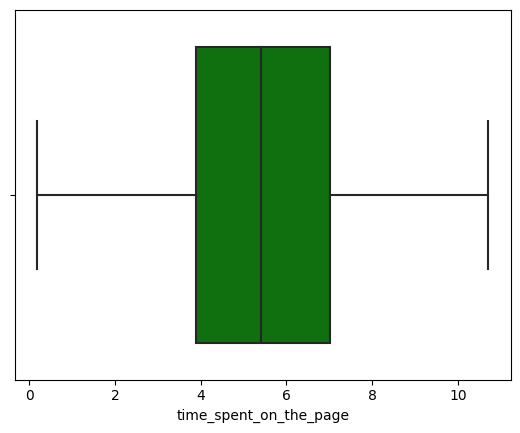

In [ ]:

sns.boxplot(data = news, x = 'time_spent_on_the_page',color = 'g');

The mean time spent on the landed page is between 5 to 6 minutes ~ 5.37 minutes.

#Converted

Text(0.5, 1.0, 'Users ')

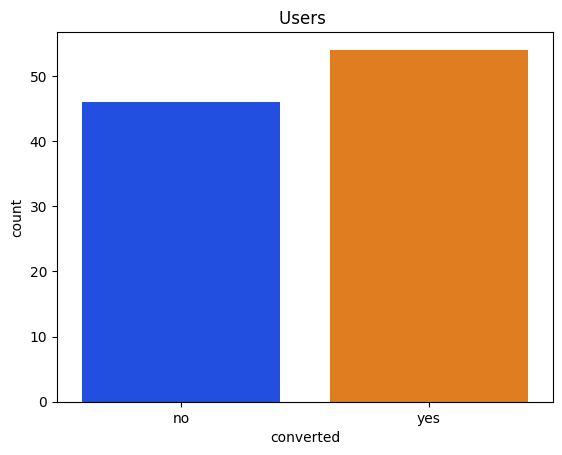

In [ ]:
sns.countplot(data = news, x = 'converted',palette = 'bright')
plt.title(('Users '))

We are seeing that the amount of conversion from the old page which is more than 50 which is more than non-converted users.

#Language Preferred

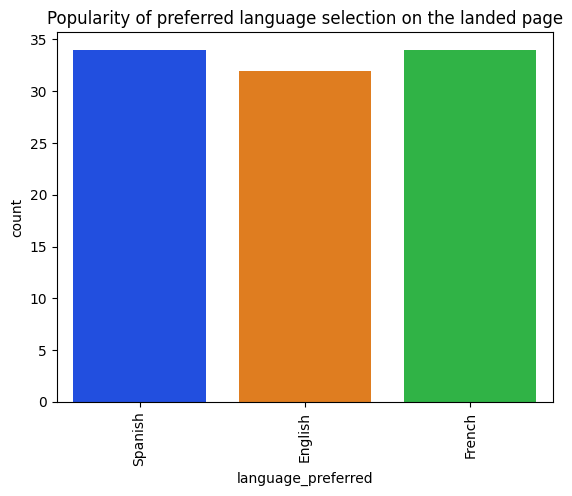

In [ ]:
sns.countplot(data = news, x = 'language_preferred',palette = 'bright');
plt.xticks(rotation = 90)
plt.title(('Popularity of preferred language selection on the landed page'))
plt.show()

This data was bit surprising to me as first English was the least popular language and Spanish and French seems to be both equally most popular languages. Maybe we have more French and Spanish speaking users rather than English commonly.

#User Id

In [ ]:
duplicate = news.duplicated('user_id').sum()
print("There are no duplicated customer id's")

There are no duplicated customer id's


#landing page

Text(0.5, 1.0, 'Users landing onto old and new landing pages')

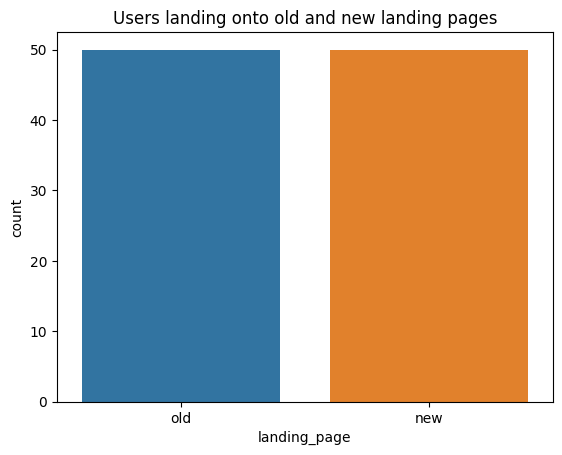

In [ ]:
sns.countplot(data = news, x = 'landing_page')
plt.title(('Users landing onto old and new landing pages'))

Here we actually don't see any difference that we may point out. And, since the samples has been equally distributed into both pages, this barplot is a good visual for that too.

### Bivariate Analysis

Landing Page Vs Converted

In [ ]:
converted_new_users = news[news['landing_page']=='new'].converted.value_counts()['yes']
print("The number of new converted users after landing on the new page is",converted_new_users)
converted_old_users = news[news['landing_page']=='old'].converted.value_counts()['no']
print("The number of old converted users on the old landing page is",converted_old_users)

The number of new converted users after landing on the new page is 33
The number of old converted users on the old landing page is 29


Group vs Time spent on the page

In [ ]:
control_group_mean_time = news[news['group']=='control'].time_spent_on_the_page.value_counts().mean()
print("The mean time for the control group is ~",round(control_group_mean_time,2),"minutes")
treatment_group_mean_time= news[news['group']=='treatment'].time_spent_on_the_page.value_counts().mean()
print("The mean time for the treatment group is ~",round(treatment_group_mean_time,2),"minutes")

The mean time for the control group is ~ 1.04 minutes
The mean time for the treatment group is ~ 1.04 minutes


Landing Page vs Time spent on the page vs Language preferred

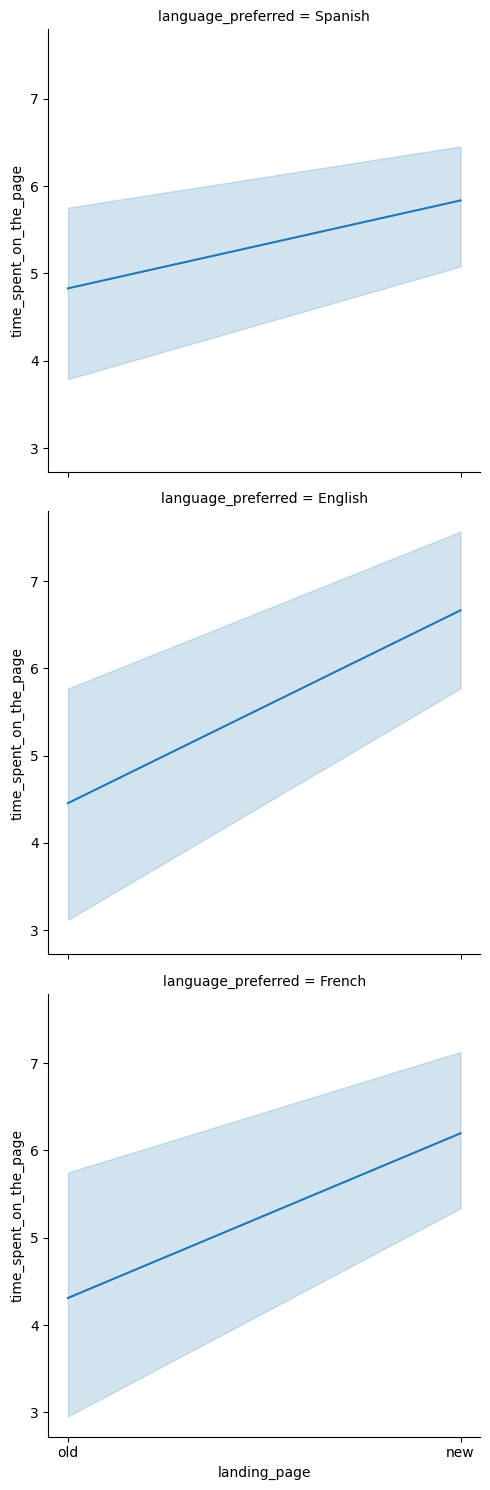

In [ ]:
sns.relplot(
    x='landing_page', #generating a lineplot as x = food_preparation_type and y as the rating
    y='time_spent_on_the_page', 
    data=news, 
    kind='line', 
    col='language_preferred',col_wrap = 1);

### Observation
The above visualization tells us that the most time spent based on the language preferrence is 'English' on the new page and the least time spent on the old page is users of French language. 

Landing Page vs Time spent on the page

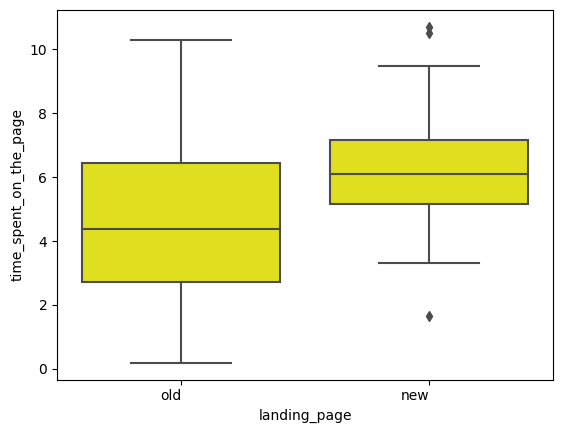

In [ ]:
sns.boxplot(
    x='landing_page', 
    y='time_spent_on_the_page',                  
    data=news,                            #generates a boxplot comparing landing pages and time spent on it
    color='yellow')
plt.xticks(ha='right');

### Observation

We see that more time was spent on the old landing page, this visual dosen't seem right because the total time on the new page was <300 minutes, where the total time on the old page is >280 minutes. But, the boxplot showed some whiskers for the new page and the median time is higher on the new page than the old one.

Conversion Vs Time Spent on the page

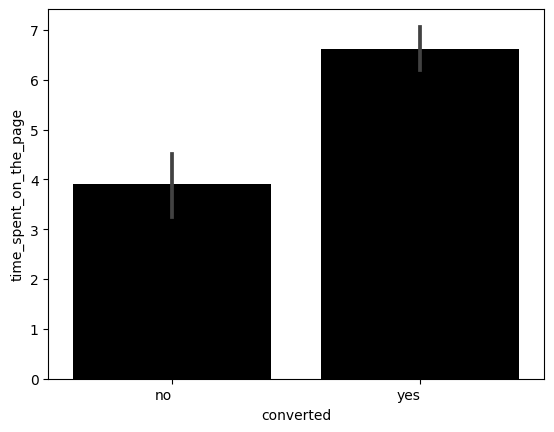

<Figure size 1500x500 with 0 Axes>

In [ ]:
sns.barplot(
    x='converted', 
    y='time_spent_on_the_page', 
    data=news,                     #generates a barplot with the bar color being black of size (15,5)
    color='black');
plt.xticks( ha='right');
plt.figure(figsize=(15,5));

### Observation
In this barplot we can see that the more the users have spent time on the page has converted.

Coversion vs Landing Page

Text(0, 0.5, 'Subscribers')

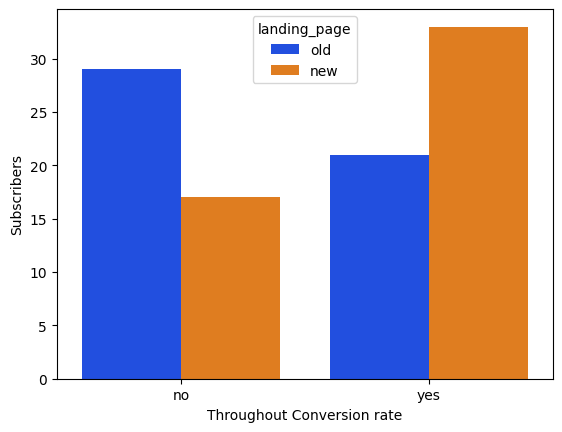

In [ ]:
bar = sns.countplot(data=news, x='converted',hue='landing_page',palette = 'bright')
bar.set_xlabel("Throughout Conversion rate")   #generates a countplot for Conversion and Landing page
bar.set_ylabel("Subscribers")

###  Observation
We can see from the bar graph that the user's conversion rate to the new landing page is higher than the old landing page. Also, there is a huge number of people not chosing to convert to the old landing page.

Language Preferred Vs Conversions 

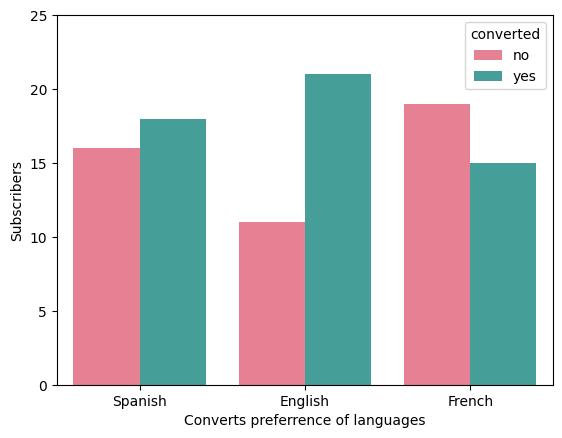

In [ ]:
bar2 = sns.countplot(data=news, x='language_preferred',hue='converted',palette = 'husl')
bar2.set_xlabel("Converts preferrence of languages")  #will generate a countplot
bar2.set_ylabel("Subscribers")
bar2.set_ylim([0,25]);

### Observation
The most conversions happened among the English language users and the most non conversions happened among the French language users.

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

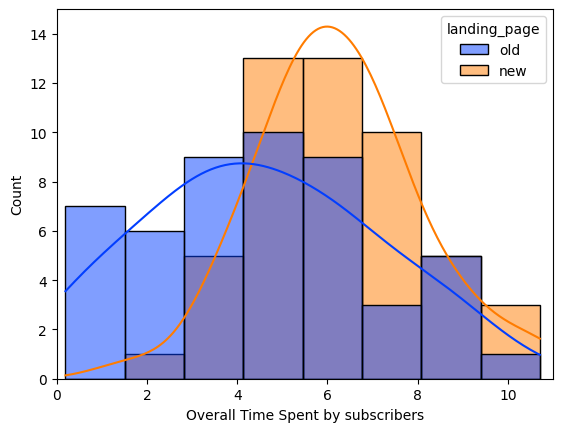

In [ ]:
sns.histplot(data = news, x = 'time_spent_on_the_page', hue = 'landing_page',kde=True,palette = 'bright')
plt.ylim([0,15])
plt.xlim([0,11])
plt.xlabel("Overall Time Spent by subscribers");



Through the barplot visualization we can see that the users tend to spend more time on the newly invented page than, the previous one.

### Step 1: Define the null and alternate hypotheses

#Null Hypothesis

Let $\mu_1, \mu_2$ be the time spent on the old existing landing page and the new invented landing page.

>$H_0:\mu_1=\mu_2$

**$H_0:$ The time spent/engagement by the subscribers on the new and old landing page is same**



#Alternative Hypothesis

Let $\mu_1, \mu_2$ be the time spent on the old existing landing page and the new invented landing page.

>$H_a:\mu_1<\mu_2$

**$H_a:$ The time spent/engagement by the subscribers on the new landing page is more than the already existed old one**

### Step 2: Select Appropriate test

Since, the standard deviation is unknown and it is two independent sets. Also, the samples have been randomly chosen. So, I think 'Two-independent sample T test' might be the best fit.

### Step 3: Decide the significance level

As mentioned in the case, the significance level is $\sigma_1$ = 0.05

### Step 4: Collect and prepare data

In [ ]:
time_old = news[news.landing_page == 'old'].time_spent_on_the_page   #calculating the time spent by the users on the old page
time_new = news[news.landing_page == 'new'].time_spent_on_the_page   #calculating the time spent by users on the new page
new_page_mean_time = news[news['landing_page']=='new'].time_spent_on_the_page.mean()  #calculating the mean time spent on the new page
old_page_mean_time = news[news['landing_page']=='old'].time_spent_on_the_page.mean()  #calculating the mean time spent on the old page
new_page_std_dvt = news[news['landing_page']=='new'].time_spent_on_the_page.std()  #calculating the standard deviations
old_page_std_dvt = news[news['landing_page']=='old'].time_spent_on_the_page.std()
print("The mean time spent by the subscribers on the new landing page is ~",round(new_page_mean_time,2),"minutes")
print("The mean time spent by the subscribers on the old landing page is ~",round(old_page_mean_time,2),"minutes")
print("The standard-deviation of the new landing page is is ~",round(new_page_std_dvt,2))
print("The standard-deviation of the old landing page is is ~",round(old_page_std_dvt,2))

The mean time spent by the subscribers on the new landing page is ~ 6.22 minutes
The mean time spent by the subscribers on the old landing page is ~ 4.53 minutes
The standard-deviation of the new landing page is is ~ 1.82
The standard-deviation of the old landing page is is ~ 2.58


### Step 5: Calculate the p-value

In [ ]:
#import the required functions
from scipy.stats import ttest_ind      #importing ttest_ind from scipy library

# find the p-value
test_stat, p_value = ttest_ind(time_old, time_new, equal_var = False, alternative = 'less')
print("The p-value is", p_value)
rounded = round(p_value,8)
print("The rounded p-value is",rounded)

The p-value is 0.00013923812251665497
The rounded p-value is 0.00013924


### Step 6: Compare the p-value with $\alpha$

In [ ]:
print("The p-value of this case appears to be ~",rounded,"and our significance level is ~ 0.05")
print("From the above observation the p-value < significance level")


The p-value of this case appears to be ~ 0.00013924 and our significance level is ~ 0.05
From the above observation the p-value < significance level


### Step 7:  Draw inference

Since the P-value is much less than the significance level so, we can actually reject the null hypothesis which is that the users/subscribers spends the same amount of time on both pages (0.00013924<0.05). So $\mu_1<\mu_2$, engagement on the new page ($\mu_2$), is more than the old existing page ($\mu_1$).

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

In [ ]:
converted_new_users_rate = news[news['landing_page']=='new'].converted.value_counts()['yes'] #users who have landed on the new page but chose to convert
converted_old_users_rate = news[news['landing_page']=='old'].converted.value_counts()['yes'] #users who have landed on the old page but chose to convert
perc_new = (converted_new_users/50*100)        #calculating the percentages
perc_old = (converted_old_users_rate/50*100)
print("The percentage of conversion on the new landing page",perc_new,"%")
print("The percentage of conversion on the old landing page",perc_old,"%")

The percentage of conversion on the new landing page 66.0 %
The percentage of conversion on the old landing page 42.0 %


Taking $p_1$ as old landing page users and $p_2$ as new landing page users who got converted, simultaneously

>$Null$ $Hypothesis$

>$P_1$ = $P_2$ 

The proportion of conversions of old and new landing page users are same.

>$Alternative$ $Hypothesis$

>$P_1$ < $P_2$ 

The proportion of conversion of the new page is more than the old page

### Let's test whether the Z-test assumptions are satisfied or not

*   Binomally distributed population - Yes, a product is either defective or non-defective.
*   Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.  
*   Can the binomial distribution approximated to normal distribution - Yes. For binary data, CLT works slower than usual. The standard thing is to check whether np and n(1-p) are greater than or equal to 10. Here, n and p refer to the sample size and sample proportion respectively.
>$n_1p_1 = 50\cdot \frac{42}{100} =21 \geq 10\\$
>$n_1(1-p_1) = 50\cdot (1-0.42)=29 \geq 10\\$
>$n_2p_2 = 50\cdot \frac{66}{100} =33 \geq 10\\$
>$n_2(1-p_2) = 50\cdot (1-0.66)=17 \geq 10\\$


### Decide the significance level

As mentioned in the case, the significance level is $\sigma_1$ = 0.05

### Calculating the p-value

In [ ]:
# import the required fuction
from statsmodels.stats.proportion import proportions_ztest
defect_count = np.array([converted_old_users_rate, converted_new_users_rate]) #for our p-value in two sample z-test
nobs = np.array([50, 50])                                #it will generate defect count
test_stat, p_value = proportions_ztest(defect_count, nobs) #will generate the p-value
print('The p-value is ' + str(p_value))      

The p-value is 0.016052616408112556


### Compare the p-value with $\alpha$

In [ ]:
print("The p-value of this case appears to be ~",p_value,"and our significance level is ~ 0.05")
print("From the above observation the p-value < significance level")

The p-value of this case appears to be ~ 0.016052616408112556 and our significance level is ~ 0.05
From the above observation the p-value < significance level


### Draw inference

Since, the p~value is really less than the significance level so, we can sucessfully reject the null hypothesis (0.1605<0.05). So we can conclude that ($p_1$<$p_2$); where the users on the new landing page were more converts rather than, the old landing page.

## 3. Is the conversion and preferred language are independent or related?

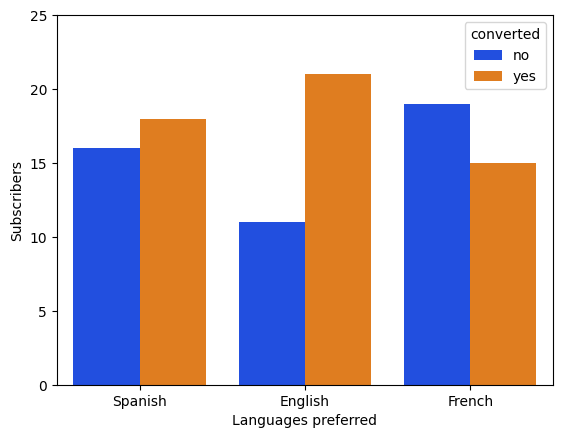

In [ ]:
converted_prefer= sns.countplot(data = news, x = 'language_preferred', hue = 'converted', palette = 'bright')
converted_prefer.set_ylim([0,25]);
converted_prefer.set_ylabel("Subscribers")
converted_prefer.set_xlabel("Languages preferred");  #will generate countplot 
                                                     #the y lim is from 0-25


From the above visualization observation, it seems like the subscribers conversion preferrence may depend upon their language preferrence. Let's do a hypothesis test to be more sure and accurate. Users of different languages have more or less conversion rates too.

### Let's write the null and alternative hypothesis


We will test the null hypothesis

>$H_0:$ Conversion preferrence is independent of language preferrence.

against the alternate hypothesis

>$H_a:$ Conversion preferrence is dependent on language preferrence.

### Deciding the significance level

As mentioned in the case, the significance level is $\sigma_1$ = 0.05

### Appropiate Test

# <a name='link14'>**Chi-Square Test for Independence**</a>

### Let's test whether the assumptions are satisfied or not

* Categorical variables - Yes
* Expected value of the number of sample observations in each level of the variable is at least 5 - Yes, the number of observations in each level is greater than 5.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.

### Creating a contingency table

In [ ]:
contingency_table = pd.crosstab(news.converted, news.language_preferred)
contingency_table      #will generate a contingent table for our chi square test

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


### Calculating the P~Value

In [ ]:
# import the required function
from scipy.stats import chi2_contingency         #from scipy library importing the ch12_contingency which
                                               

# find the p-value
chi, p_value, dof, expected = chi2_contingency(contingency_table)
print('The p-value is', p_value)

The p-value is 0.21298887487543447


### Compare the p-value with $\alpha$

In [ ]:
print("The p-value of this case appears to be ~",p_value,"and our significance level is ~ 0.05")
print("From the above observation the p-value(0.21298) > significance level(0.05)")
print(0.21298>0.05)

The p-value of this case appears to be ~ 0.21298887487543447 and our significance level is ~ 0.05
From the above observation the p-value(0.21298) > significance level(0.05)
True


### Draw inference

Since the P~Value (~0.21298) is > the significance level (~0.05) so we fail to reject the null hypothesis and can also fail to conclude that the conversion rates does not depend on the preferred languages.

## 4. Is the time spent on the new page same for the different language users?

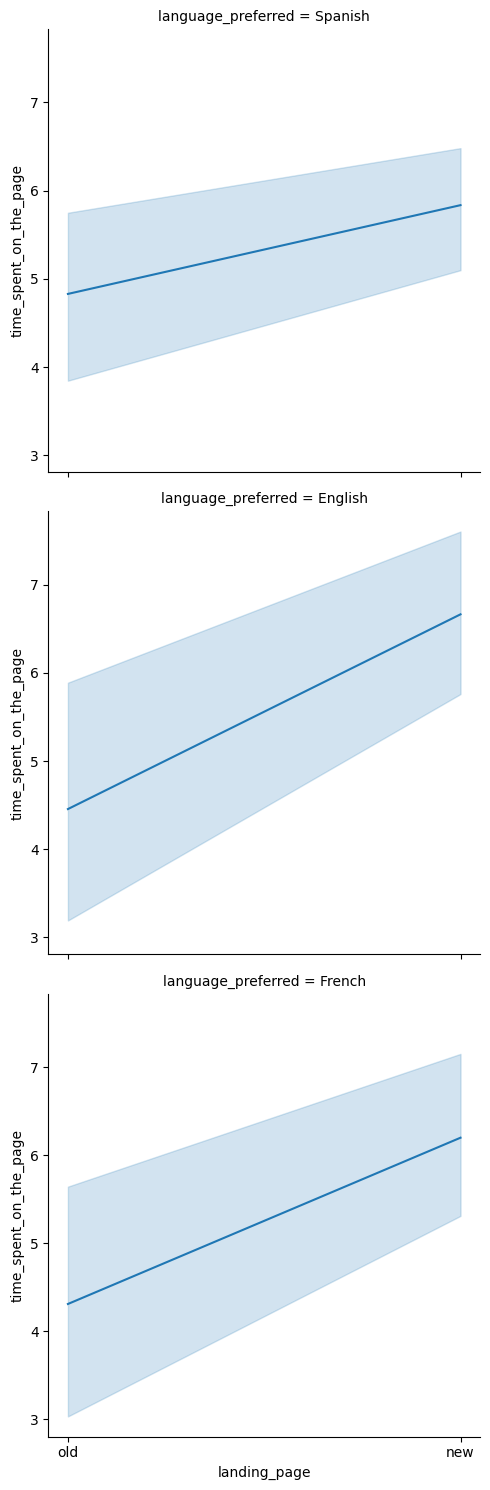

In [ ]:
sns.relplot(
    x='landing_page', #generating a lineplot as x = food_preparation_type and y as the rating
    y='time_spent_on_the_page', 
    data=news, 
    kind='line', 
    col='language_preferred',col_wrap = 1);    #genrates replot keeping x as the landing page, y as the time spent on the page and based on the languages preferred

### Let's write the null and alternative hypothesis

Let $\mu_1, \mu_2, \mu_3$ be the means of time spent on the page for language preferences English, Spanish and French respectively.

We will test the null hypothesis

>$H_0: \mu_1 = \mu_2 = \mu_3$

against the alternative hypothesis

>$H_a: $ At least users of one language section spends more mean time .

### Selecting the appropiate test

# <a name='link15'>**One-way ANOVA Test**</a>

### Since, it involves the comparison of three independent populations from our datasets so, ANOVA test might be our best option. We will check our hypothesis through the Shapiro-Wilk and Levene's test.

>$H_0$: The time spent has a normal distribution

>$H_a$: The time spent does not have a normal distribution

### P-Value from Shapiro Wilk test

In [ ]:
#seperating the data for new page users
news_new_page = news[news.landing_page == 'new']
#calculating P value using shapiro
from scipy import stats

# find the p-value
w, p_value = stats.shapiro(news_new_page.time_spent_on_the_page) 
print('The p-value is', p_value)

The p-value is 0.8040016293525696


### Draw inference

Since the P~Value is (0.80400), we fail to reject the null hypothesis. So, based on our tests so far the null hypothesis which was time spent by different language preferred users couldn't be rejected.

### Levene’s test

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [ ]:
#Assumption 2: Homogeneity of Variance
#import the required function
from scipy.stats import levene
statistic, p_value = levene( news['time_spent_on_the_page'][news['language_preferred']=="English"], 
                                   news['time_spent_on_the_page'][news['language_preferred']=="Spanish"], 
                                   news['time_spent_on_the_page'][news['language_preferred']=="French"])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.06515086840327314


### Draw inference

Since, the p~value (~0.6515) is higher than the significance level(~0.05) so, we fail to reject the null hypothesis of the time spent by the different language preferred users aren't different couldn't be rejected. But more testing required.

## Conclusion and Business Recommendations

### Conclusion

### The majority of the users of the portal converted (<50%).
### The popularity of preferred languages seems to maintain a very close range which was impressive but, I think further research will actually give us a more definite data.
### The mean time spent on the page seems to be only more than 5 minutes which is obviously not much for a popular news portal.
### Since, the data was evenly distributed among the samples so the 'control' and the 'treatment' group shared the same mean time.
### Through our test and observation we have enough valid reason to say that the users has spent more time on the new landing page than the old landing page. 
### The percentage of converted users to the new landing page is 66% where, the percentage of converted users to the old landing page is 42%
### As a user has spent more time, he/she has most of the times converted to the new landing page.
### So far from our observation we have failed to say that the conversion rate depends on the preferred languages.
### And, also we fail to conclude that more time spent by different users based on language preferrence is different.

### Recommendations

### The sample mean time was only 5.37 minutes and the most time spent by an user was 10 minutes which actually dosen't look good for a sucessful portal. The new page also needs more updates. 

### A little more than half converted to subscribers, this will actually affect the business margin. So it also requires more attention.

### Since, its already in three-languages as the popularities are also great but, if two more languages region based could have been added then maybe the news portal would expect more readers.

### If we had those data's available then, we could have looked for the age of most of the readers maybe, our news portal dosen't have sufficient resources to attract young adults or students so that they feel the importance of more engagement in it.

___

/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `jupyter nbconvert --to html (solution)_ENews_Express_Full_Code_Version.ipynb'
